,Height,Pressure
0,48,29.1
1,46,30.6
2,44,31.9
3,42,33.2
4,40,35.3


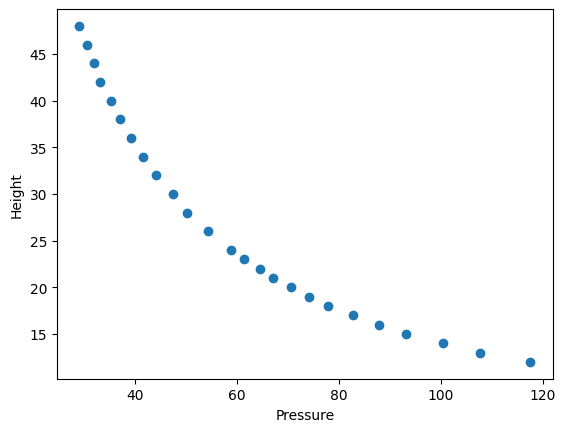

In [11]:
import pandas
import matplotlib.pyplot as plt
import math
import numpy as np

df = pandas.read_csv("Boyle.txt",sep="\t", skiprows=1, names=['Height','Pressure'])

plt.plot(df["Pressure"],df["Height"], 'o')
plt.xlabel('Pressure')
plt.ylabel('Height')

df.head()

In [12]:
a_modele_lineraire = df.cov()['Height']['Pressure']/df.cov()['Pressure']['Pressure']
b_modele_lineraire = df['Height'].mean() - a_modele_lineraire * df['Pressure'].mean()
a_modele_lineraire,b_modele_lineraire

(np.float64(-0.40564866794048976), np.float64(52.07956253837833))

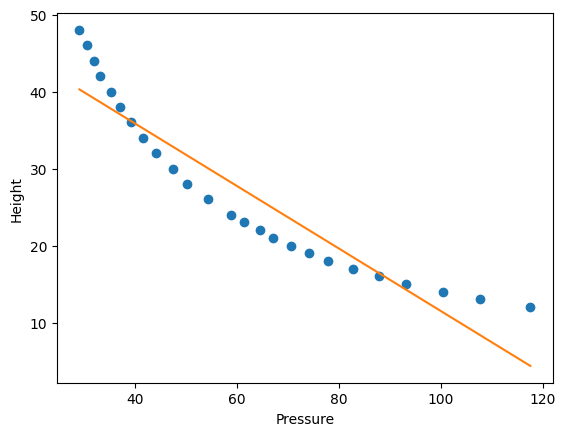

In [13]:
df['Modele linéaire'] = a_modele_lineraire * df['Pressure'] + b_modele_lineraire

plt.plot(df['Pressure'], df['Height'], 'o')
plt.plot(df['Pressure'], df['Modele linéaire'], '-')
plt.xlabel('Pressure')
plt.ylabel('Height')
plt.show()

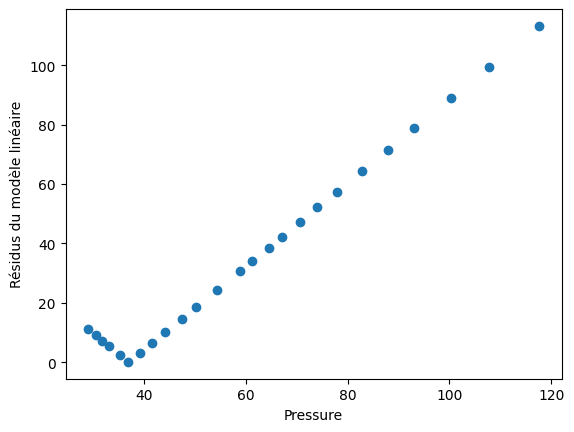

In [14]:
df["Résidus du modèle linéaire"] = df.apply(lambda r:np.abs(r['Pressure']-r["Modele linéaire"]), axis=1)
plt.plot(df['Pressure'], df['Résidus du modèle linéaire'], 'o')
plt.xlabel('Pressure')
plt.ylabel('Résidus du modèle linéaire')
plt.show()

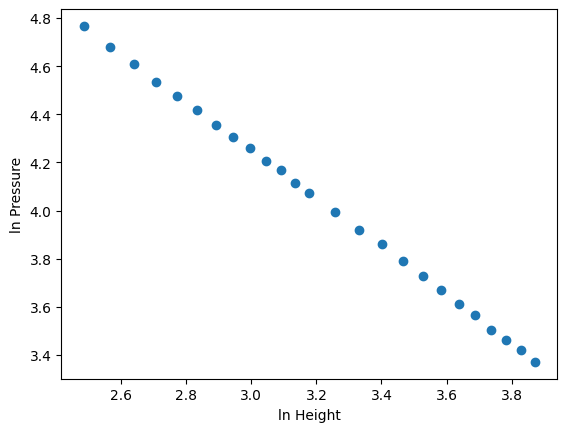

In [15]:
df['ln Height'] = np.log(df['Height'])
df['ln Pressure'] = np.log(df['Pressure'])

plt.plot(df['ln Height'], df['ln Pressure'], 'o')
plt.xlabel('ln Height')
plt.ylabel('ln Pressure')
plt.show()

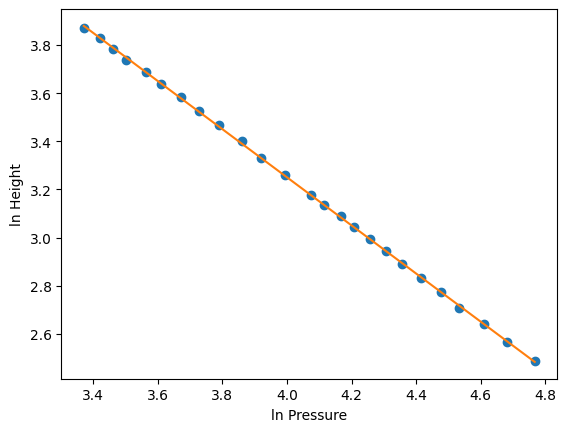

In [16]:
a_modele_puissance = df.cov()['ln Height']['ln Pressure']/df.cov()['ln Pressure']['ln Pressure']
b_modele_puissance = df['ln Height'].mean() - a_modele_puissance * df['ln Pressure'].mean()

df['Modele puissance (espace puissance)'] = a_modele_puissance * df['ln Pressure'] + b_modele_puissance

plt.plot(df['ln Pressure'], df['ln Height'], 'o')
plt.plot(df['ln Pressure'], df['Modele puissance (espace puissance)'], '-')
plt.xlabel('ln Pressure')
plt.ylabel('ln Height')
plt.show()

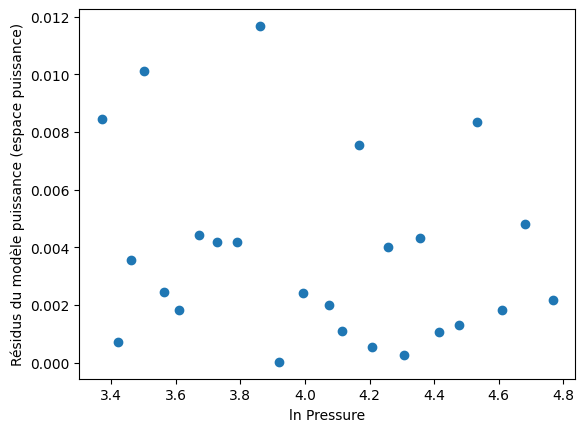

In [ ]:
df["Résidus du modèle puissance (espace puissance)"] = df.apply(lambda r:r['ln Height']-r["Modele puissance (espace puissance)"], axis=1)
plt.plot(df['ln Pressure'], df['Résidus du modèle puissance (espace puissance)'], 'o')
plt.xlabel('ln Pressure')
plt.ylabel('Résidus du modèle puissance (espace puissance)')
plt.show()

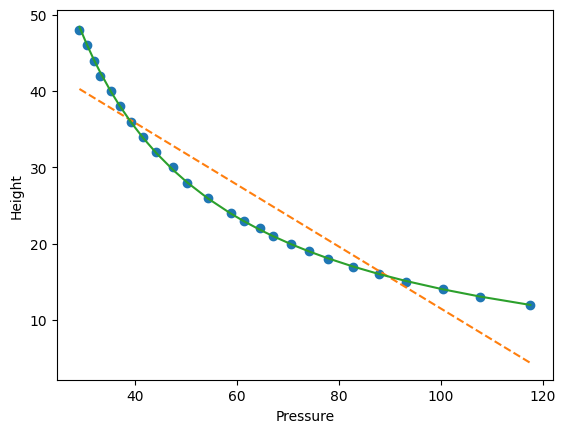

In [21]:
df['Modele puissance (espace linéaire)'] = np.exp(df['Modele puissance (espace puissance)'])

plt.plot(df['Pressure'], df['Height'], 'o')
plt.plot(df['Pressure'], df['Modele linéaire'], '--')
plt.plot(df['Pressure'], df['Modele puissance (espace linéaire)'])
plt.xlabel('Pressure')
plt.ylabel('Height')
plt.show()

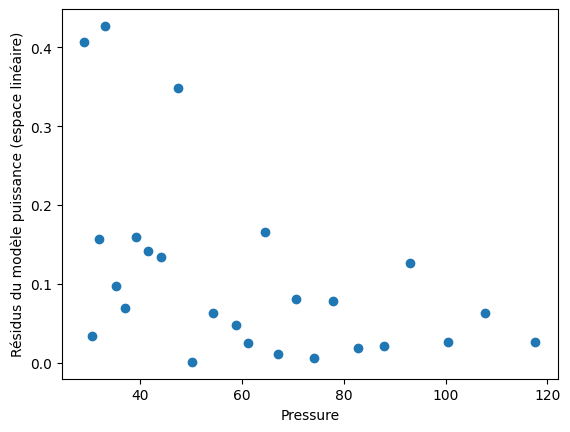

In [22]:
df["Résidus du modèle puissance (espace linéaire)"] = df.apply(lambda r:np.abs(r['Height']-r["Modele puissance (espace linéaire)"]), axis=1)
plt.plot(df['Pressure'], df['Résidus du modèle puissance (espace linéaire)'], 'o')
plt.xlabel('Pressure')
plt.ylabel('Résidus du modèle puissance (espace linéaire)')
plt.show()